In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageOps
from imageio import imread

import json

In [10]:
def breakImageDown(image):
    blocksWithNumbers = []

    inputImage = imread(image)
    grayImage = 0.21267*inputImage[:,:,0] + 0.715160*inputImage[:,:,1] + 0.072169*inputImage[:,:,2]
    grayImage = np.uint8(grayImage)
    thresholdvalue = 240
    TF_matrix = (grayImage > thresholdvalue)
    threshold = TF_matrix * 1

    # Finding top
    topPixel = -1
    for i in range(int(threshold.shape[0]/2)):
        if threshold[i, int(threshold.shape[1]/2)] == 0:
            topPixel = i
            break

    # Finding bottom
    bottomPixel = -1
    for i in range(threshold.shape[0] - 1, int(threshold.shape[0]/2), -1):
        if threshold[i, int(threshold.shape[1]/2)] == 0:
            bottomPixel = i
            break

    # Finding left
    leftPixel = -1
    for i in range(int(threshold.shape[1]/2)):
        if threshold[int(threshold.shape[0]/2), i] == 0:
            leftPixel = i
            break

    # Finding right
    rightPixel = -1
    for i in range(threshold.shape[1] - 1, int(threshold.shape[1]/2), -1):
        if threshold[int(threshold.shape[0]/2), i] == 0:
            rightPixel = i
            break

    if topPixel < 0 or bottomPixel < 0 or leftPixel < 0 or rightPixel < 0:
        print('Unable to find edge of sudoku.')
        return

    trimmedImage = threshold[topPixel:bottomPixel, leftPixel:rightPixel]

    # Iterate through each block
    blockWidth = int((trimmedImage.shape[1])/9)
    blockHeight = int((trimmedImage.shape[0])/9)
    for i in range(9):
        for j in range(9):
            blockImage = trimmedImage[i*blockHeight:(i+1)*blockHeight, j*blockWidth:(j+1)*blockWidth]
            zoomedBlock = blockImage[4:blockHeight - 4, 4:blockWidth - 4]
            resizedBlock = Image.fromarray(zoomedBlock).resize((28,28))
            resizedBlock = np.array(resizedBlock)
            for k in range(resizedBlock.shape[0]):
                for l in range(resizedBlock.shape[1]):
                    if resizedBlock[k,l] == 0:
                        resizedBlock[k,l] = 1
                    else:
                        resizedBlock[k,l] = 0
            if len(np.unique(resizedBlock)) == 1:
                continue
            else:
                plt.imshow(resizedBlock, cmap='gray')
                plt.show()
                numberShown = input('What number is in this image?')
                plt.close()
                blocksWithNumbers.append((resizedBlock, numberShown))
    return blocksWithNumbers

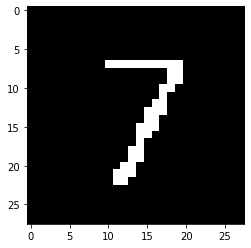

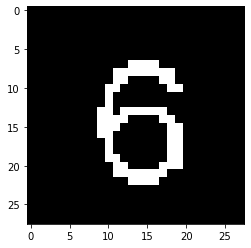

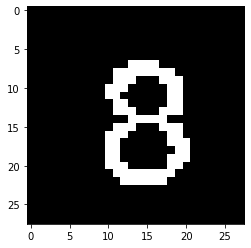

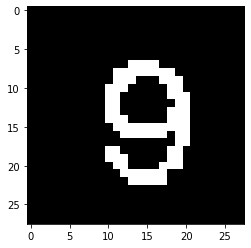

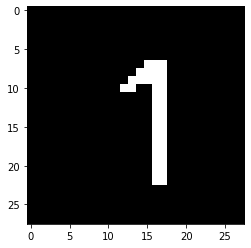

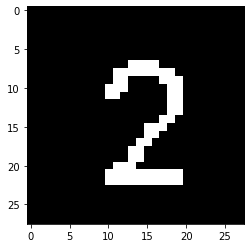

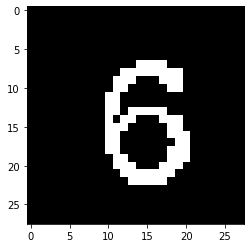

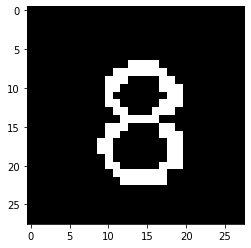

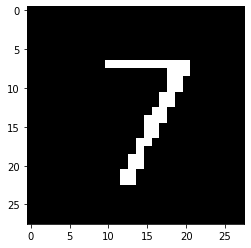

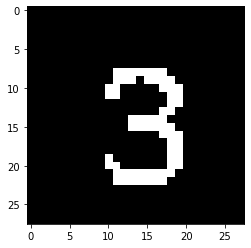

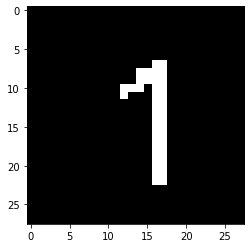

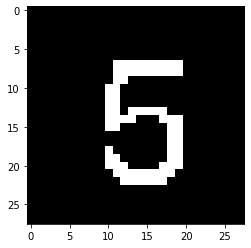

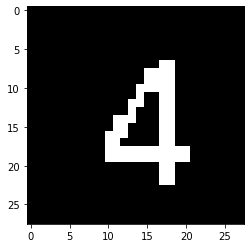

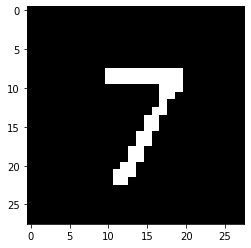

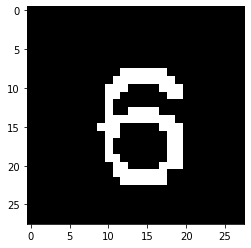

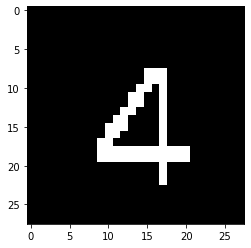

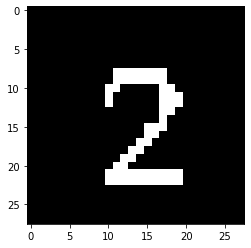

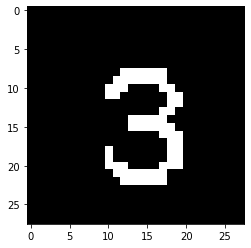

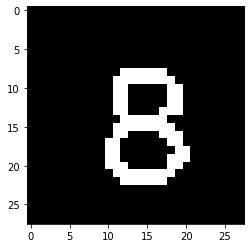

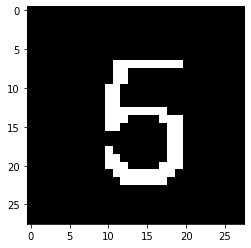

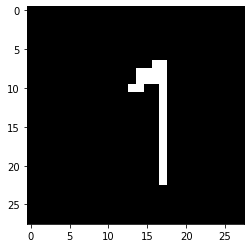

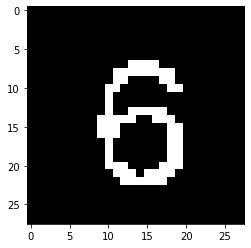

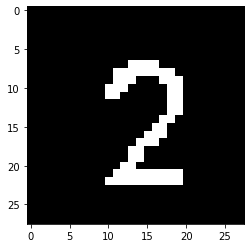

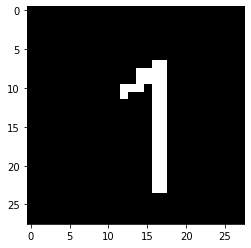

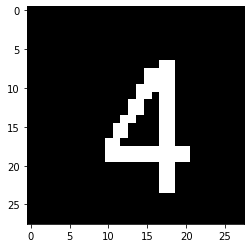

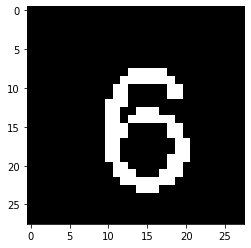

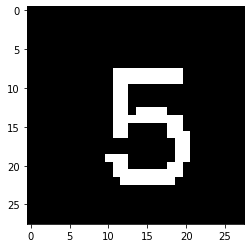

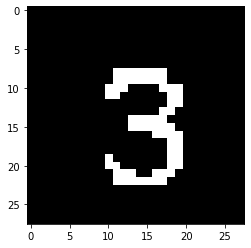

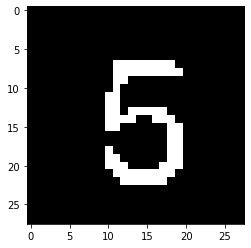

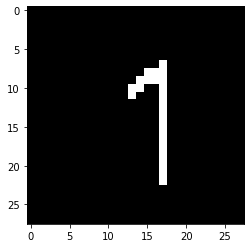

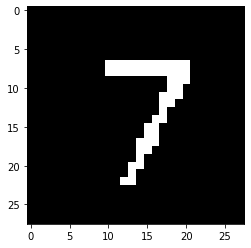

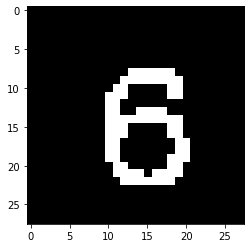

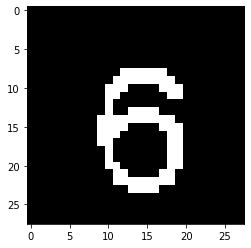

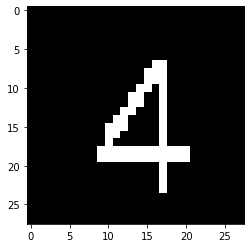

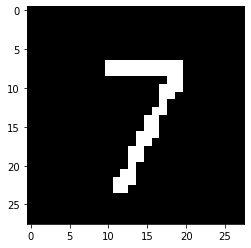

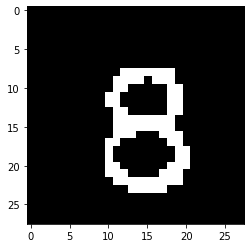

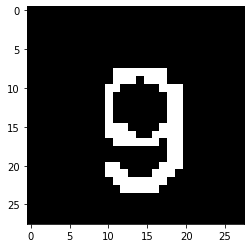

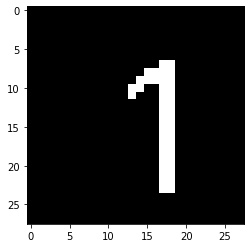

TypeError: Object of type ndarray is not JSON serializable

In [12]:
roundOneData = breakImageDown('testImage.jpg')

In [16]:
with open('collectedData.json', 'w') as openedFile:
    json.dump(list(roundOneData), openedFile)

TypeError: list expected at most 1 arguments, got 2